Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Input features: Runs, At Bats, Hits, 
Doubles, Triples, Homeruns, Walks, 
Strikeouts, Stolen Bases,
Runs Allowed, Earned Runs, Earned Run Average
(ERA), Shutouts, Saves, Complete Games 
and Errors
-- Output: Number of predicted wins (W)
To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url='https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv'
df=pd.read_csv(url)

In [2]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [3]:
df.shape

(30, 17)

In [4]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [5]:
df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


<AxesSubplot:>

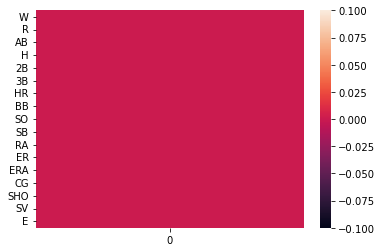

In [6]:
# to check if null value exists in data
# df.apply(lambda x: sum(x.isnull()))
sns.heatmap(df.isnull().sum().to_frame())

Shows no null values are present.

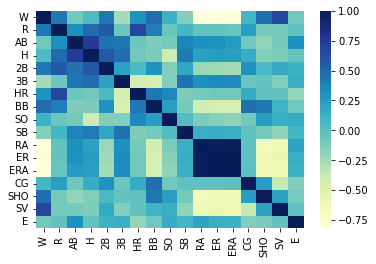

In [7]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu")
  
# displaying heatmap
plt.show()

RA, ER & ERA have strong negative corelation with wins.
SV have strong positive corelation with wins.

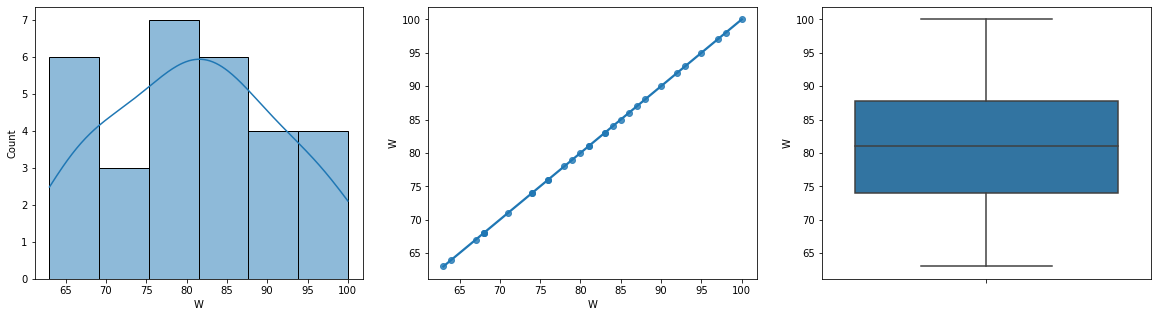

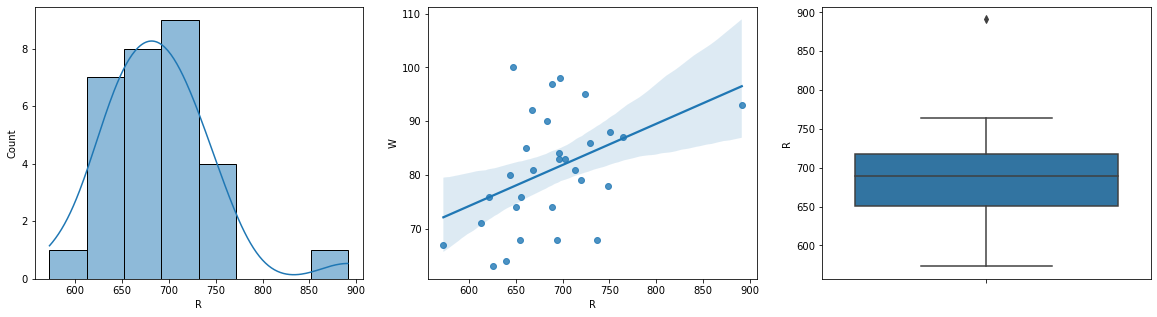

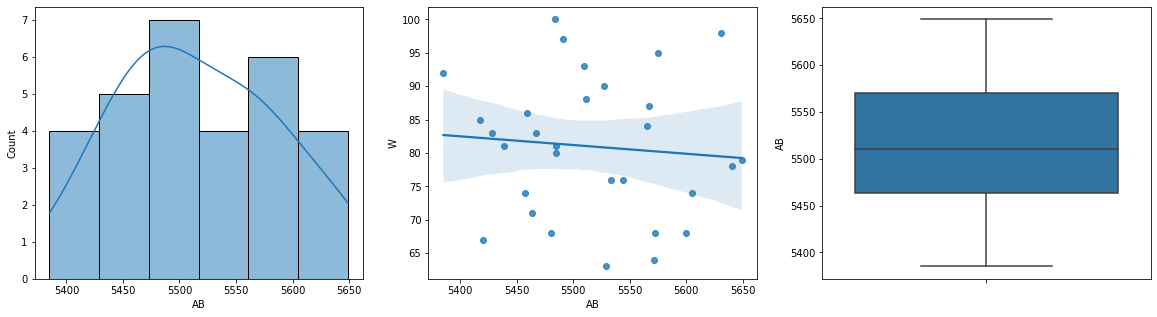

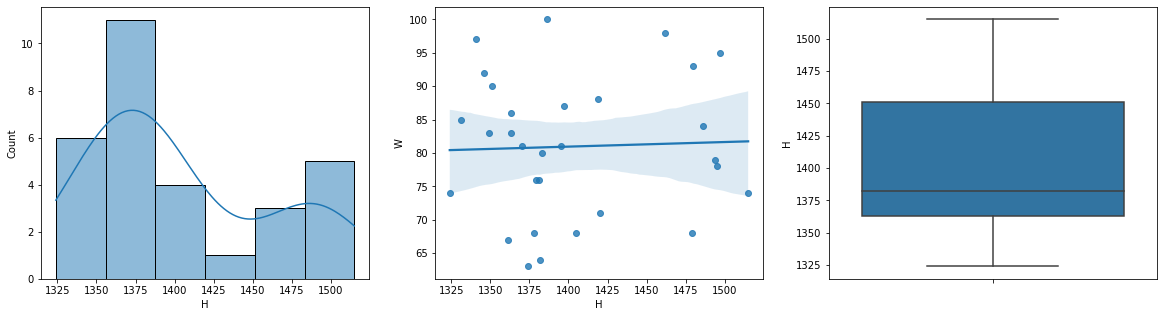

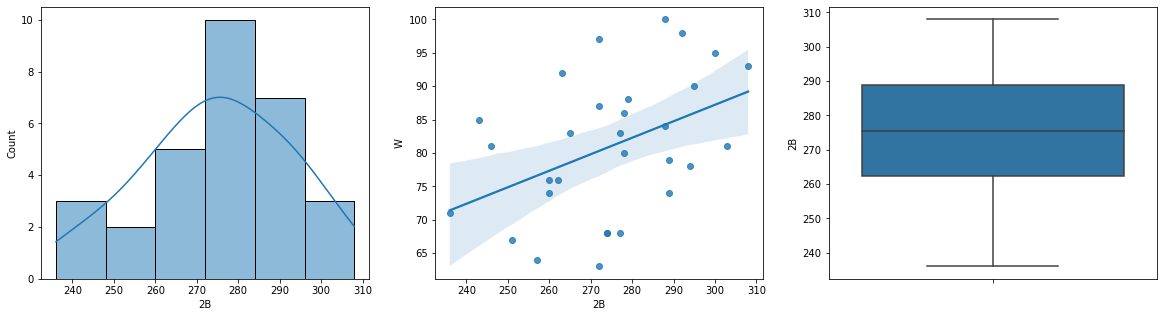

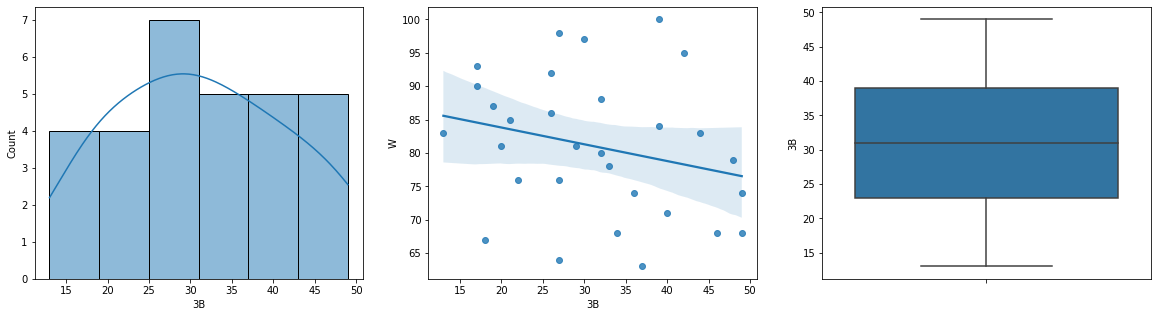

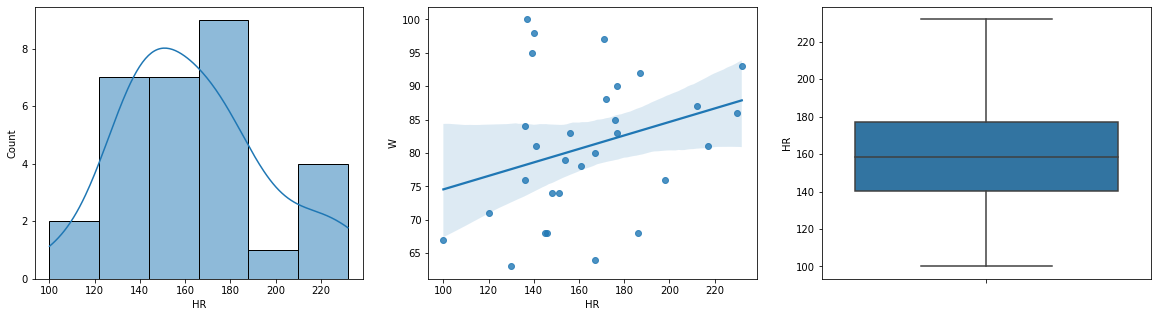

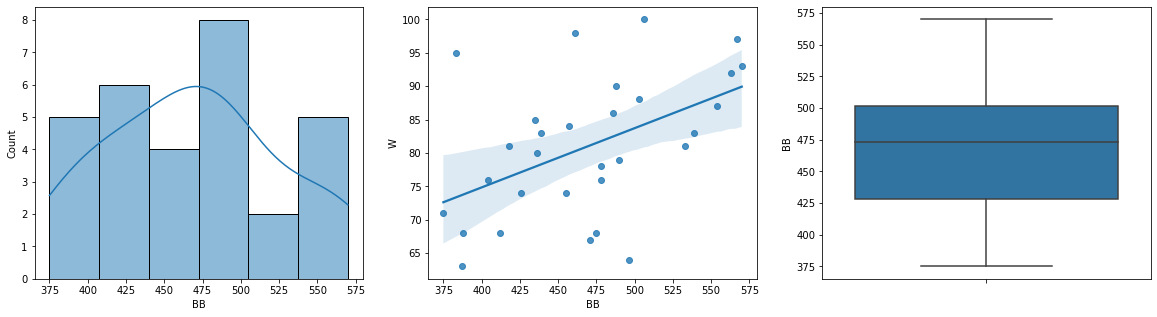

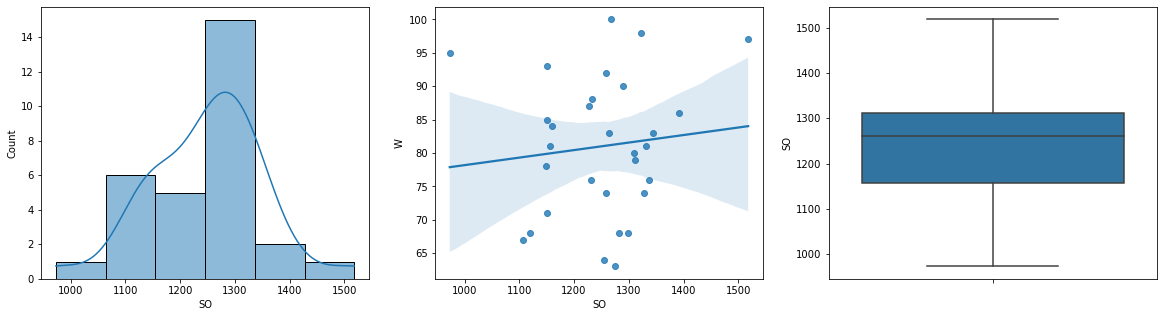

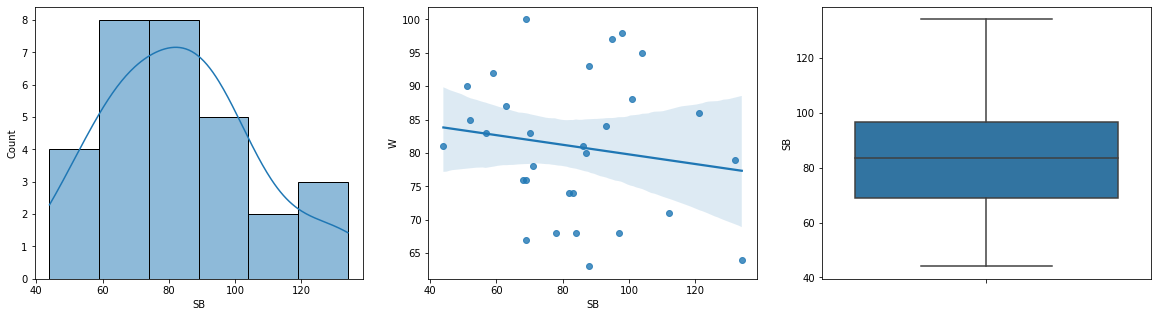

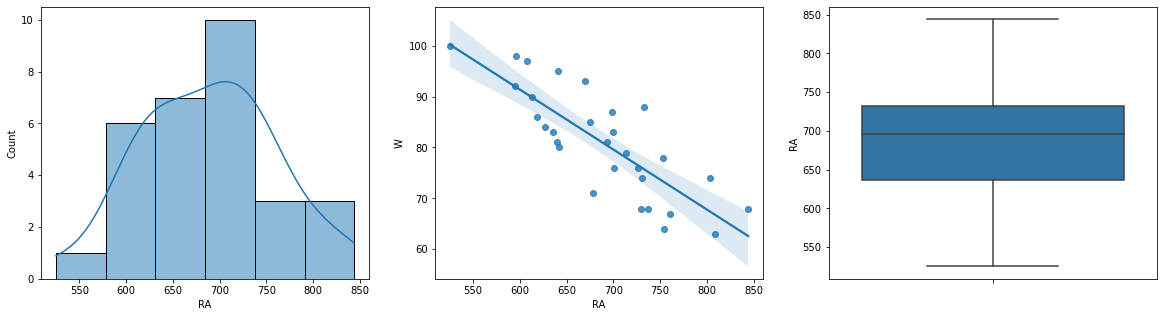

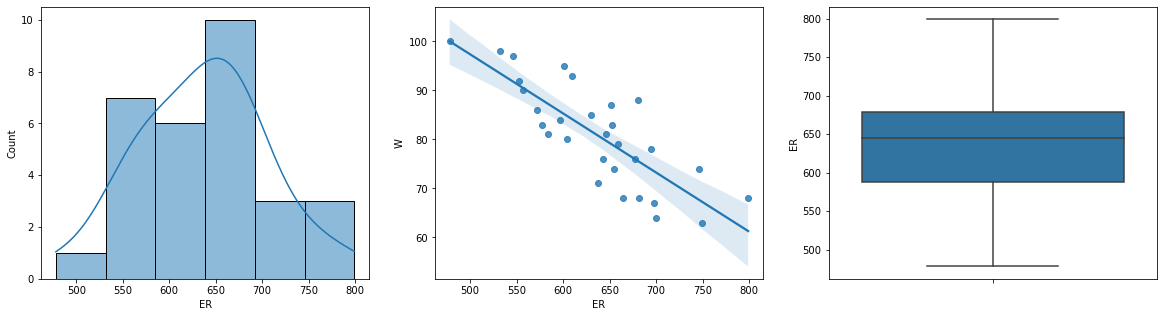

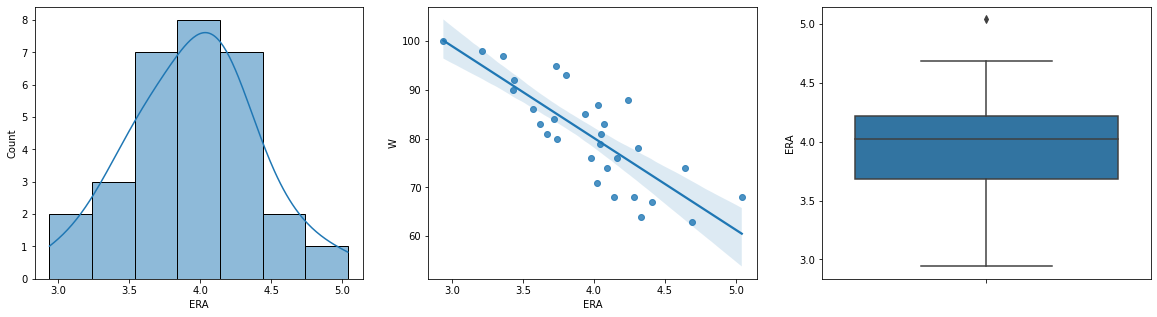

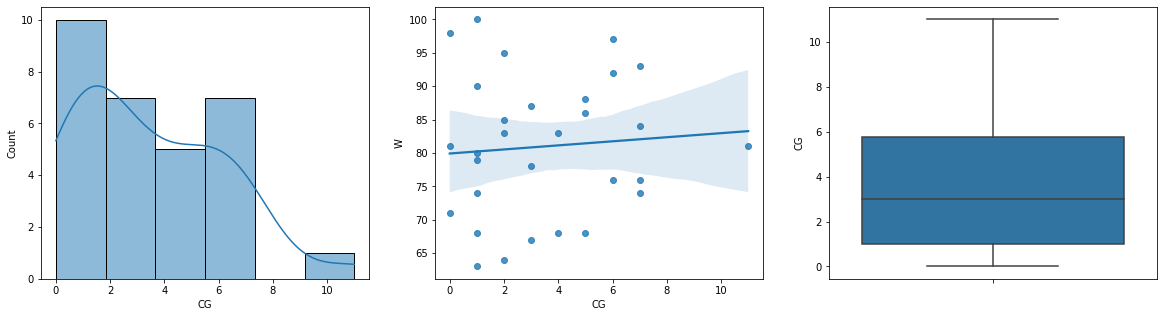

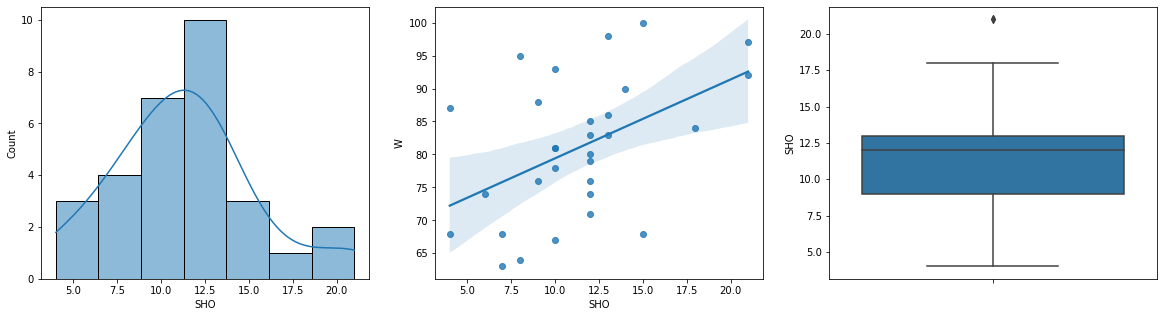

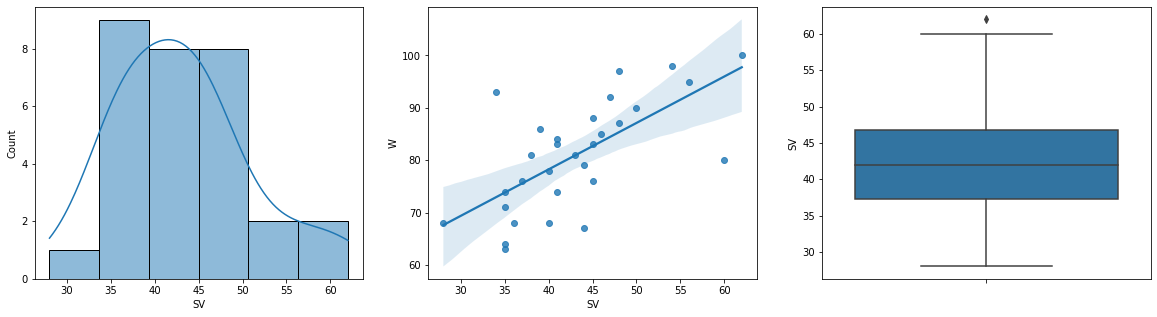

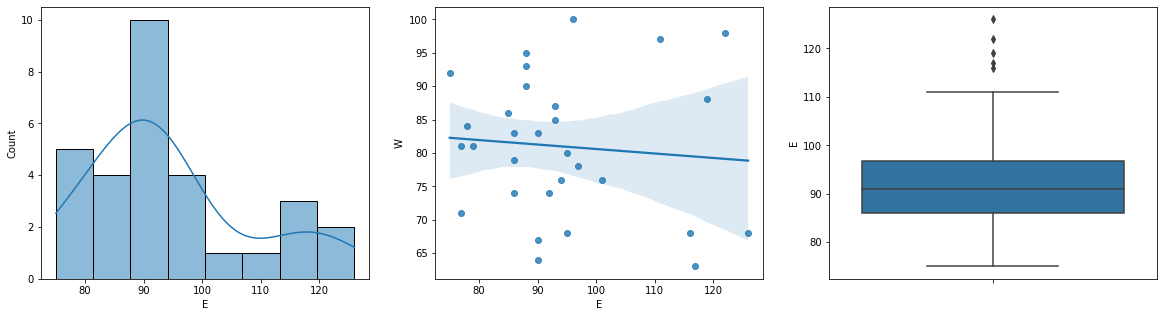

<Figure size 432x288 with 0 Axes>

In [8]:
def pplot(df,i):
    plt.figure(figsize=(20,5),facecolor='white')
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y='W',data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
plotnum=1
for column in df:
    if(plotnum<=17):
        pplot(df,column)
    plotnum+=1
plt.tight_layout()

In [9]:
x = df.drop(columns=['W'])
y = df['W']

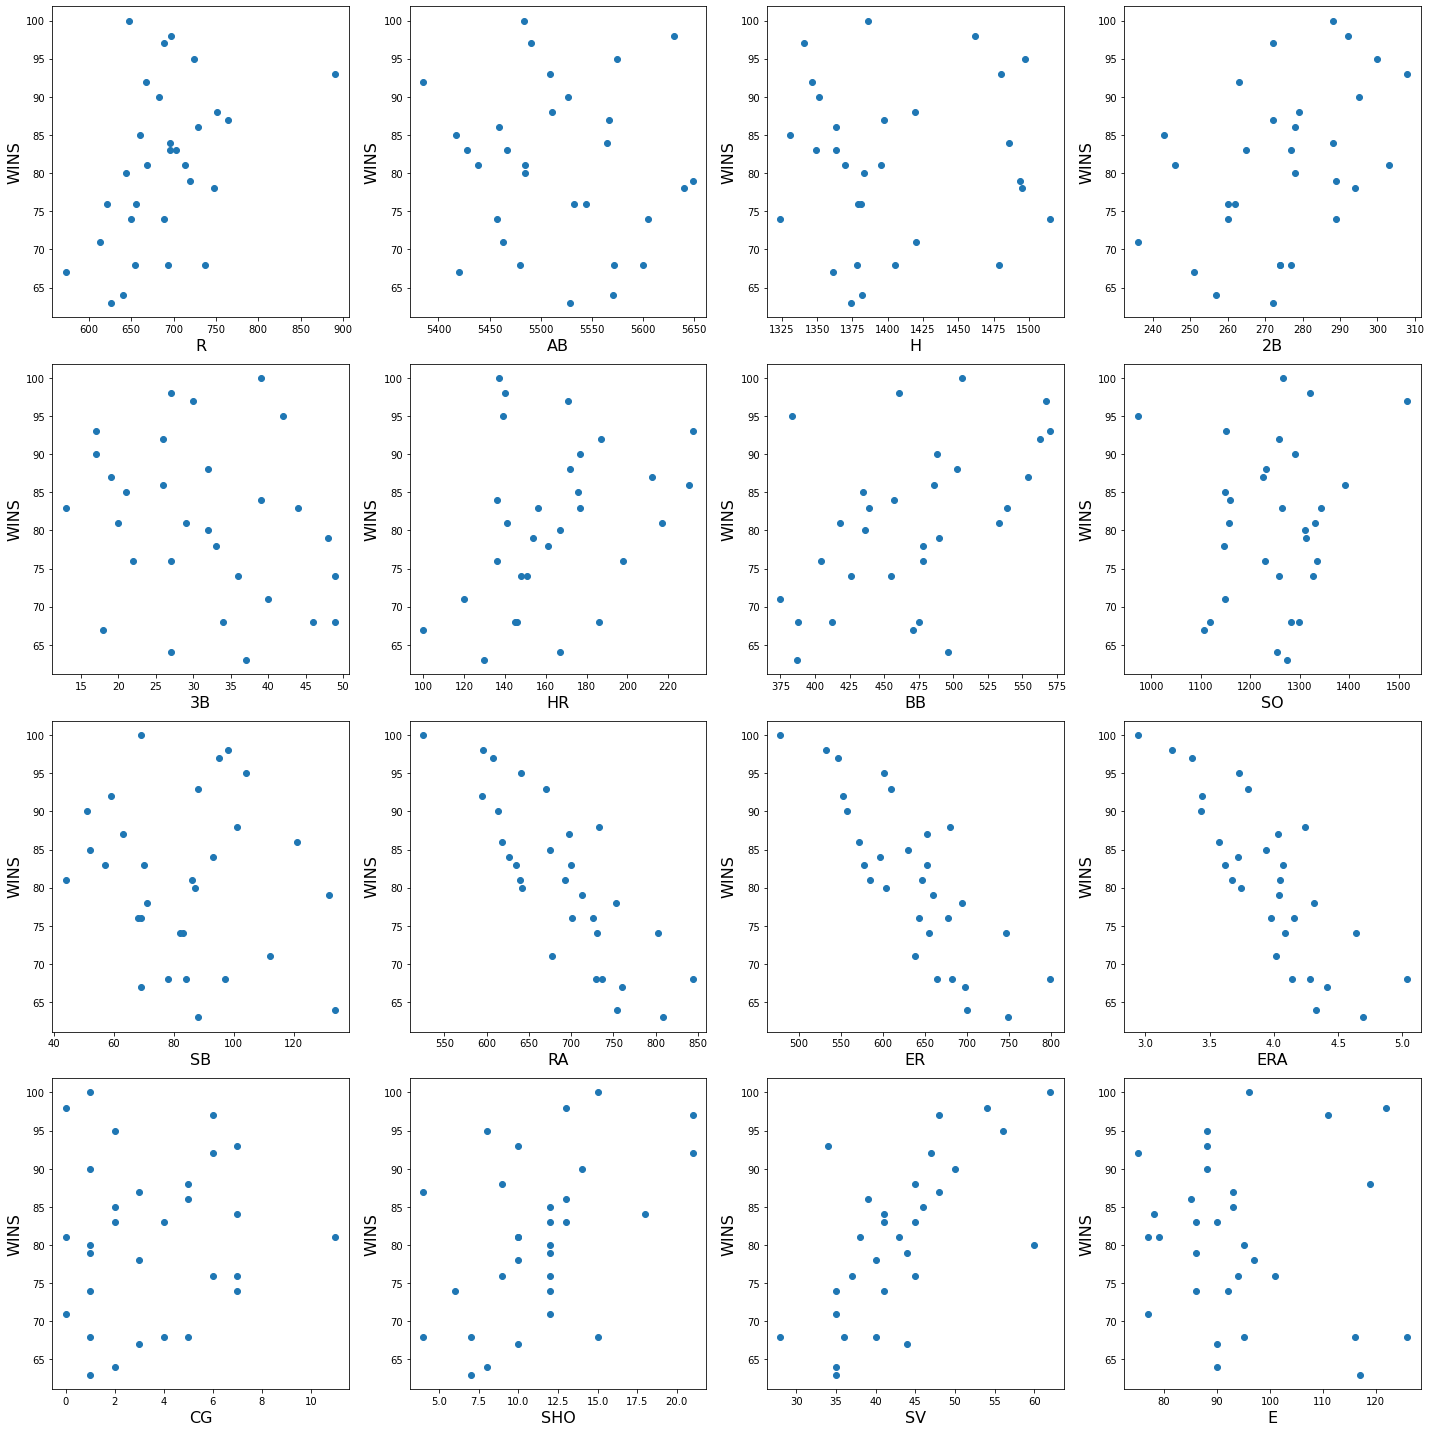

In [10]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for column in x:
    if(plotnum<=16):
        ax=plt.subplot(4,4,plotnum)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=16)
        plt.ylabel('WINS',fontsize=16)

    plotnum+=1
plt.tight_layout()

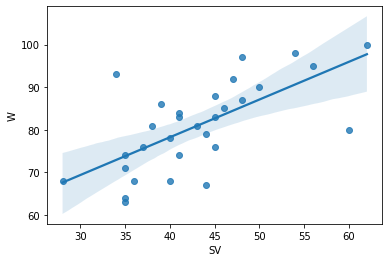

In [117]:
sns.regplot(x='SV',y='W',data=df)
plt.show()

<AxesSubplot:xlabel='ER', ylabel='W'>

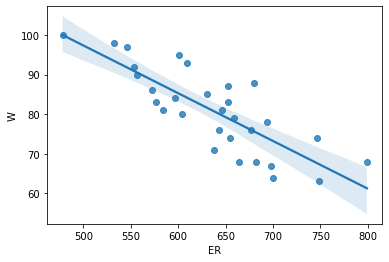

In [11]:
sns.regplot(x='ER',y='W',data=df)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [32]:
x_scaled=scaler.fit_transform(x)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x_scaled, y, test_size=0.3)

In [19]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
 
lm.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred=lm.predict(X_test)
# plotting predictions
plt.figure(figsize=(10,5))
plt.scatter(x_test,y_test,s=15)
plt.plot(x_test,y_pred,color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()


NameError: name 'x_test' is not defined

<Figure size 720x360 with 0 Axes>

In [22]:
lm.score(X_train,y_train)

0.9585648969656608

In [23]:
lm.score(X_test,y_test)

-0.13157422274375663

In [24]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  9.3917979   -0.82879286   2.87365278  -4.71628147   3.21244524
   0.24459273  -3.78490385   3.50886833  -5.14952812   0.25683422
  26.80693554 -37.76146598   0.86817791   0.87336259   1.86513857
  -0.84199965]


In [25]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test,y_pred)

-0.13157422274375663

In [26]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

Mean squared error: 178.54


In [27]:
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

NameError: name 'neighbors' is not defined

In [28]:
# Putting together the test and predicted values
result = pd.DataFrame()
result["y_test"] = y_test
result['prediction'] = y_pred

result

,y_test,prediction
15,100,100.087291
0,95,84.387305
10,88,74.312744
26,84,85.533499
19,64,49.974094
23,67,44.984267
24,63,51.825921
7,81,96.901248
2,81,65.335465


In [30]:
from sklearn.linear_model import Lasso, Ridge, LassoCV,RidgeCV
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, cross_validate

lassCv=LassoCV(alphas=None,cv=10,max_iter=20000,normalize=True)
lassCv.fit(X_train,y_train)

LassoCV(cv=10, max_iter=20000, normalize=True)

In [31]:
alpha=lassCv.alpha_
alpha

0.1499377825247608

In [196]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.24781822240293327)

In [197]:
lasso_reg.score(X_test,y_test)

0.9163731031888771

In [198]:
lass_pred=lasso_reg.predict(X_test)

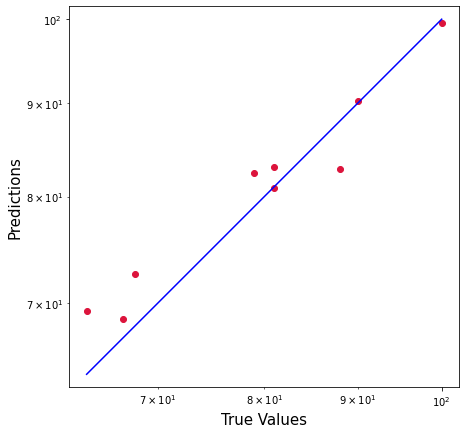

In [263]:
# plotting predictions

plt.figure(figsize=(7,7))
plt.scatter(y_test, lass_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(lass_pred), max(y_test))
p2 = min(min(lass_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [199]:
# Putting together the test and predicted values
result = pd.DataFrame()
result["y_test"] = y_test
result['lasso_prediction'] = lass_pred

result

,y_test,lasso_prediction
15,100,99.476604
27,79,82.388276
10,88,82.806468
19,64,69.286246
20,90,90.259536
2,81,83.085794
23,67,68.612235
18,68,72.610139
7,81,80.855510


In [176]:
#ridge
alphas=np.random.uniform(low=0,high=10,size=(50,))
ridgeCv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgeCv.fit(X_train,y_train)

RidgeCV(alphas=array([0.25292077, 7.84757243, 6.37036243, 0.07056222, 2.72333341,
       6.82334678, 7.34793494, 9.46098441, 6.64258252, 7.32041447,
       0.12211961, 3.51373638, 4.19863876, 1.26883615, 2.48812214,
       7.01546968, 2.05480602, 4.93446348, 8.23213151, 2.520078  ,
       7.67583243, 8.25915838, 1.5021744 , 0.43141983, 2.23642739,
       3.13745279, 6.57428345, 6.64408211, 8.44771092, 0.94154531,
       4.5150213 , 9.71887955, 6.22821763, 1.81888631, 6.79284757,
       1.8537409 , 6.21726713, 9.72269564, 7.77224922, 1.72322162,
       9.33887643, 9.43081397, 6.46771477, 9.85592066, 5.0081963 ,
       0.43062385, 8.51763249, 8.73878621, 8.43695547, 8.30205085]),
        cv=10, normalize=True)

In [177]:
ridgeCv.alpha_

2.236427387057601

In [178]:
ridgeModel=Ridge(alpha=ridgeCv.alpha_)
ridgeModel.fit(X_train,y_train)

Ridge(alpha=2.236427387057601)

In [179]:
ridgeModel.score(X_test,y_test)

0.8982540049105534

In [180]:
ridge_pred=ridgeModel.predict(X_test)
# Putting together the test and predicted values
result = pd.DataFrame()
result["y_test"] = y_test
result['ridge_prediction'] = ridge_pred

result

,y_test,ridge_prediction
15,100,100.583324
27,79,82.189334
10,88,82.560969
19,64,68.901507
20,90,89.869739
2,81,85.229522
23,67,69.975393
18,68,72.855270
7,81,79.957962


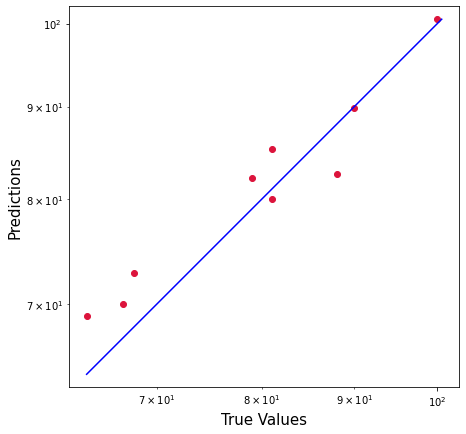

In [266]:
# plotting predictions

plt.figure(figsize=(7,7))
plt.scatter(y_test, ridge_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(ridge_pred), max(y_test))
p2 = min(min(ridge_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [221]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)


Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [230]:
x_cols=df.drop(columns=['W'])
x_cols.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [231]:
X_train_df = pd.DataFrame(X_train, columns =x_cols.columns)


In [225]:
y_train_df = pd.DataFrame()
y_train_df['y_train'] = y_train


In [232]:
pipe.fit(X_train_df,y_train_df)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [233]:
poly_pred=pipe.predict(X_test)

In [234]:
# Putting together the test and predicted values
poly_result = pd.DataFrame()
poly_result["y_test"] = y_test
poly_result['poly_pred'] = poly_pred

poly_result

,y_test,poly_pred
15,100,82.744291
27,79,89.463646
10,88,77.267863
19,64,73.580025
20,90,77.952609
2,81,81.006515
23,67,79.922917
18,68,73.062990
7,81,81.479751


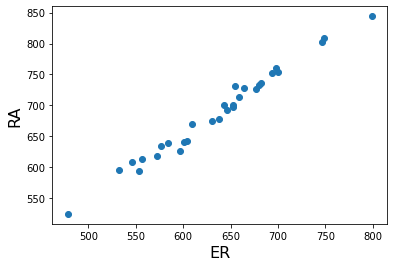

In [240]:
plt.scatter(df['ER'],df['RA'])
plt.xlabel('ER',fontsize=16)
plt.ylabel('RA',fontsize=16)
plt.show()

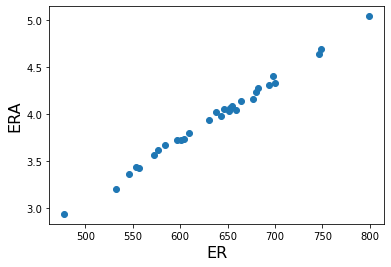

In [241]:
plt.scatter(df['ER'],df['ERA'])
plt.xlabel('ER',fontsize=16)
plt.ylabel('ERA',fontsize=16)
plt.show()

In [247]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x.columns

vif
# greater than 5 means high multi-collinearity

,vif,features
0,11.522370,R
1,13.311532,AB
2,10.070668,H
3,4.019297,2B
4,3.294146,3B
5,10.079902,HR
6,3.806098,BB
7,2.652401,SO
8,2.102684,SB
9,191.839155,RA


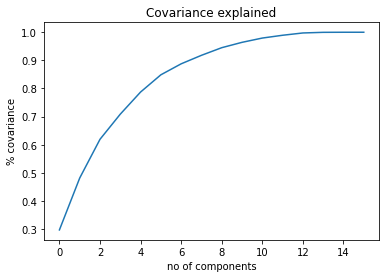

In [250]:
from sklearn.decomposition import PCA
pca=PCA()
principal_components=pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of components')
plt.ylabel('% covariance')#for each component
plt.title('Covariance explained')
plt.show()

In [253]:
pca=PCA(n_components=10)
new_data=pca.fit_transform(x_scaled)

principla_x=pd.DataFrame(new_data,columns=['1','2','3','4','5','6','7','8','9','10'])

In [254]:
principla_x

,1,2,3,4,5,6,7,8,9,10
0,0.867413,2.122345,-2.894358,0.669670,-2.731243,0.147389,0.635840,0.321777,-0.462272,-0.020176
1,0.130337,-0.870952,-0.351691,0.134231,-0.211433,0.468177,-0.904620,0.929330,-0.852782,-0.625750
2,-1.311442,1.177871,0.666544,2.976226,0.312964,-0.639481,1.136171,1.596495,0.234307,0.653205
3,0.765362,-1.377492,-0.051721,0.950416,0.423381,-1.075740,0.063431,-0.105279,0.028011,1.593964
4,3.323426,1.681766,0.273832,1.260491,0.864381,0.260109,-1.708900,0.463959,0.672309,0.110339
5,-0.923627,4.086316,3.319173,0.318585,-1.168070,-0.190317,0.960672,-0.395233,-0.801111,-0.167729
6,-0.290468,0.738750,2.201384,-1.446595,-1.693805,-0.599754,0.338534,0.008548,0.856549,-0.427661
7,-0.593708,-1.961116,1.796415,-1.146524,-1.658562,1.107181,-1.327971,-0.739914,-0.320259,0.534286
8,-1.324598,-0.735104,-1.534594,-1.140173,-0.529206,0.467598,-0.210044,0.943309,0.293857,-0.171844
9,2.062331,2.069248,0.209600,-0.094183,-0.944075,-0.922906,-0.794728,-0.670389,0.536733,-0.138445


In [255]:
p_train, p_test, py_train, py_test = train_test_split( principla_x, y, test_size=0.3)

lm2.fit(p_train, py_train)

LinearRegression()

In [256]:
p_pred=lm2.predict(p_test)
r2_score(py_test,p_pred)

0.5358374681757758

In [267]:

#import required packages
from sklearn import neighbors
from math import sqrt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 10.666666666666666
RMSE value for k=  2 is: 8.353309390761112
RMSE value for k=  3 is: 6.903210918670696
RMSE value for k=  4 is: 6.819600020854922
RMSE value for k=  5 is: 7.359347797189639
RMSE value for k=  6 is: 7.7497510911840655
RMSE value for k=  7 is: 8.042263644966347
RMSE value for k=  8 is: 8.359022902761357
RMSE value for k=  9 is: 8.383225134089743
RMSE value for k=  10 is: 8.220570404648196
RMSE value for k=  11 is: 8.113802590041006
RMSE value for k=  12 is: 8.692136718939755
RMSE value for k=  13 is: 8.7262780722415
RMSE value for k=  14 is: 8.933490708330517
RMSE value for k=  15 is: 9.192267281676362
RMSE value for k=  16 is: 9.362352580058781
RMSE value for k=  17 is: 9.659962675535219
RMSE value for k=  18 is: 9.894331974045542
RMSE value for k=  19 is: 10.529297823219084
RMSE value for k=  20 is: 10.956188002930379


<AxesSubplot:>

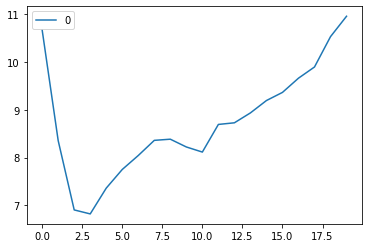

In [268]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [271]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)

model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set


In [272]:
model.score(X_test,y_test)

0.6223091976516635

In [274]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [276]:
result = regr.predict(X_test)
regr.score(X_test,y_test)

0.3747194376772238